**PROBLEM DEFINITION**

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

**DATA**

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


**FEATURES**

This is where you'll get different information about each of the features in your data.

create data dictionary

1.age - age in years

2.sex - (1 = male; 0 = female)

3.cp - chest pain type


4.trestbps - resting blood pressure 

5.chol - serum cholestoral 

6.fbs - fasting blood sugar 

7.restecgresting electrocardiographic results

8.thalach - maximum heart rate achieved

9.exang - exercise induced angina (1 = yes; 0 = no)

10.oldpeak - ST depression induced by exercise relative to rest
  looks at stress of heart during excercise unhealthy heart will stress more

11.slope - the slope of the peak exercise ST segment
  

12.ca - number of major vessels (0-3)

13.thal - thalium stress result
  
14.target - have disease or not (1=yes, 0=no) (=the predicted attribute)

**Human** **Heart**

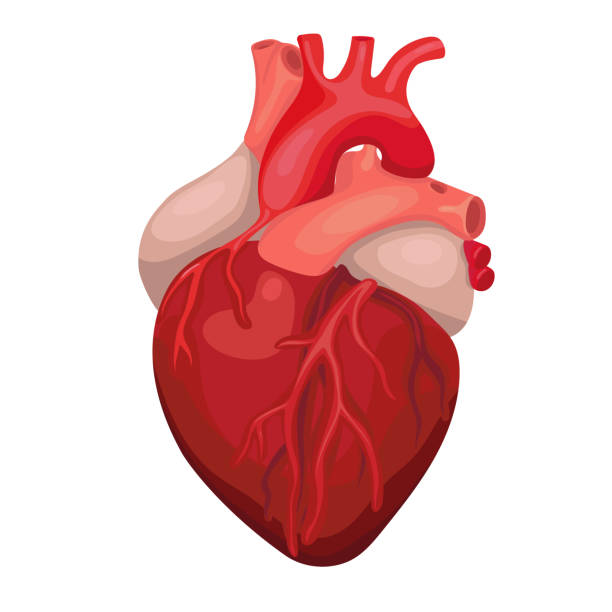

1.**Importing** **the Dependencies**


In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
%matplotlib inline

In [30]:
import warnings
warnings.filterwarnings('ignore')

2.**Data** **Collection and Processing**


In [2]:
# loading the csv file to a Pandas Dataframe (structured tables)
heart_data=pd.read_csv('/content/heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [67]:
# print number of rows and columns in the dataset
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# information about the dataset
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since there are no missing values in the above dataset, all the values of that dataset can be used.

In [9]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The above table gives us the statistical measures of the dataset.

If the target value is 0 means that the person does not have any heart disease and if the target value is 1 means that the person has a heart disease.

In [11]:
# checking how many have heart disease and how many do not have (Target variable distribution)
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Hence 165 people have some heart related disease and 138 of the people do not have any disease.

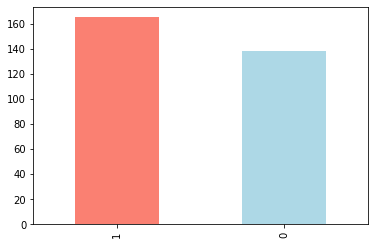

In [75]:
heart_data["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

The above figure shows the plot of the people who have a heart disease and how many do not have .


In [27]:
x=heart_data.drop(columns='target', axis=1)
y=heart_data['target']
print(x)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [28]:
print(y)


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In the above step we are splitting the features and the target , features are used to predict the target.

x contains ----> features columns

y contains ----> target column

In [13]:
# Splitting the training data and test data 
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, stratify=y,random_state=2)

x_train ----> contains all features of the training data 

x_test  ----> contains all features of the test data 

y_train ----> contains the target of all features present in x_train 

y_test  ----> contains the target of all features present in x_test 

In [44]:
y_train.head()


61     1
238    0
160    1
158    1
289    0
Name: target, dtype: int64

In [48]:
for x in x_train:
  print(x)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [46]:
for x in x_test:
  print(x)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [14]:
# check number of training and test data 
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


3.**Model** **Training**

--->Logistic Regression

In [15]:
# loading one instance of the logistic regression model into the variable model
model=LogisticRegression()

In [16]:
# training the model with training data 
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

The above step finds the relation or pattern between the features and the target.

4.**Model Evaluation**

----> *Accuracy Score* 

In [17]:
# accuracy on the training data
x_train_prediction = model.predict(x_train) # predicts the target value 
training_data_accuracy = accuracy_score(x_train_prediction, y_train) #finds accuracy score

In [18]:
print('Training Data Accuracy:', training_data_accuracy)

Training Data Accuracy: 0.8512396694214877


In [19]:
# accuracy on the test data
x_test_prediction = model.predict(x_test) # predicts the target value 
test_data_accuracy = accuracy_score(x_test_prediction, y_test) #finds accuracy score

In [20]:
print('Test Data Accuracy:', test_data_accuracy)


Test Data Accuracy: 0.819672131147541


Here our model is not overfitted as the training data accuracy and test data accuracy is almost similar and there is no much difference .

5.**Buliding a Predictive System**

--->This system, based on the input features checks if a persons heart is defective or not.

In [35]:
input_data = (56,1,1,120,236,0,1,178,0,0.8,2,0,2)
# change input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
# reshape the numpy array as we are predicting only for one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The person has a defective heart')
else:
  print('The person does not have a defective heart')


[1]
The person does not have a defective heart


In [43]:
input_data = (62,1,0,120,267,0,1,99,1,1.8,1,2,3)
# change input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
# reshape the numpy array as we are predicting only for one instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The person does not have a defective heart')
else:
  print('The person has a defective heart')
  

[0]
The person does not have a defective heart
